In [16]:
                                                    # AI HR Attrition Prediction Platform – Predicts employee churn early

In [17]:
#Importing libraries to be used in this Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import joblib
import gradio as gr

In [19]:
df= pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [20]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [21]:
df.shape

(1470, 35)

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [25]:
# Dropping columns
# Drop ID / constant columns
drop_cols = ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours","BusinessTravel"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print("Columns after drop:", df.shape[1])
print("Attrition distribution:\n", df["Attrition"].value_counts())

Columns after drop: 30
Attrition distribution:
 Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [26]:
df.isnull().sum()

,0
Age,0
Attrition,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0
HourlyRate,0


In [27]:
df.count()

,0
Age,1470
Attrition,1470
DailyRate,1470
Department,1470
DistanceFromHome,1470
Education,1470
EducationField,1470
EnvironmentSatisfaction,1470
Gender,1470
HourlyRate,1470


In [28]:
df.dtypes

,0
Age,int64
Attrition,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EnvironmentSatisfaction,int64
Gender,object
HourlyRate,int64


In [29]:
# Using label encoder as the target label is YES or NO here it is much better to use 1 or 0 for better usage
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])


In [30]:
df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [31]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [44]:
avg_income = np.mean(df["MonthlyIncome"])

print("Average Monthly Income:", avg_income)

Average Monthly Income: 6502.931292517007


In [42]:
np.std(df["Age"])

9.13226569061539

In [32]:
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

model = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model.fit(X_train, y_train)
print("Training complete")


Training complete


In [33]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred, zero_division=0), 4))
print("Recall   :", round(recall_score(y_test, y_pred, zero_division=0), 4))
print("F1 Score :", round(f1_score(y_test, y_pred, zero_division=0), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_prob), 4))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy : 0.7438
Precision: 0.3456
Recall   : 0.662
F1 Score : 0.4541
ROC AUC  : 0.8043

Confusion Matrix:
 [[281  89]
 [ 24  47]]


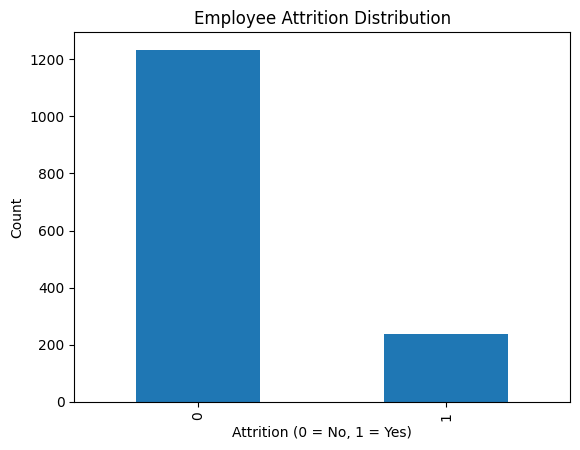

In [34]:
df["Attrition"].value_counts().plot(kind="bar")
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

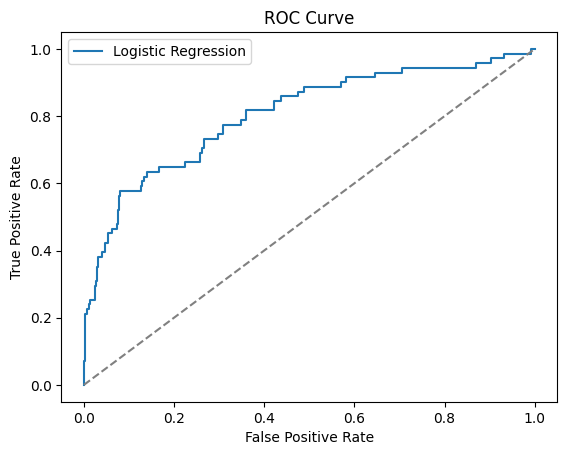

In [35]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [36]:
# Defaults: numeric -> median, categorical -> most frequent
defaults = {}
for c in X.columns:
    if X[c].dtype == "object":
        defaults[c] = X[c].mode()[0]
    else:
        defaults[c] = float(X[c].median())

bundle = {
    "model": model,
    "defaults": defaults,
    "columns": list(X.columns)
}

joblib.dump(bundle, "attrition_bundle.pkl")
print("✅ Saved: attrition_bundle.pkl")


✅ Saved: attrition_bundle.pkl


In [37]:
# Get feature names after preprocessing
ohe = model.named_steps["prep"].named_transformers_["cat"]
ohe_features = list(ohe.get_feature_names_out(cat_cols)) if len(cat_cols) else []
feature_names = num_cols + ohe_features

weights = model.named_steps["clf"].coef_[0]

imp = pd.DataFrame({"Feature": feature_names, "Weight": weights})
imp["AbsWeight"] = imp["Weight"].abs()
imp = imp.sort_values("AbsWeight", ascending=False)

imp.head(15)


,Feature,Weight,AbsWeight
42,JobRole_Sales Representative,1.434856,1.434856
39,JobRole_Research Director,-1.179251,1.179251
36,JobRole_Laboratory Technician,0.924730,0.924730
46,OverTime_No,-0.884184,0.884184
47,OverTime_Yes,0.775145,0.775145
30,EducationField_Other,-0.771079,0.771079
26,EducationField_Human Resources,0.765720,0.765720
34,JobRole_Healthcare Representative,-0.748840,0.748840
7,JobLevel,0.671846,0.671846
21,YearsSinceLastPromotion,0.592780,0.592780


In [38]:
emp1 = X_test.iloc[[0]]
emp2 = X_test.iloc[[10]]

p1 = model.predict_proba(emp1)[0][1]
p2 = model.predict_proba(emp2)[0][1]

print(f"Employee #1 Attrition Risk: {p1:.2%}")
print(f"Employee #2 Attrition Risk: {p2:.2%}")

Employee #1 Attrition Risk: 81.34%
Employee #2 Attrition Risk: 5.93%


In [39]:
scored = X_test.copy()
scored["AttritionRisk"] = model.predict_proba(X_test)[:, 1]
scored["PredictedAttrition"] = (scored["AttritionRisk"] >= 0.5).astype(int)

scored.head()


,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionRisk,PredictedAttrition
397,25,891,Sales,4,2,Life Sciences,2,Female,99,2,...,0,5,3,3,5,4,1,3,0.813423,1
832,37,367,Research & Development,25,2,Medical,3,Female,52,2,...,2,9,2,3,6,2,1,3,0.186998,0
483,35,538,Research & Development,25,2,Other,1,Male,54,2,...,0,9,3,3,3,2,0,2,0.726805,1
456,31,688,Sales,7,3,Life Sciences,3,Male,44,2,...,1,10,3,2,5,4,0,1,0.284882,0
1342,34,1480,Sales,4,3,Life Sciences,3,Male,64,3,...,3,9,3,3,5,3,1,0,0.273020,0


In [40]:
bundle = joblib.load("attrition_bundle.pkl")
model = bundle["model"]
defaults = bundle["defaults"]
cols = bundle["columns"]

def predict_attrition(Age, MonthlyIncome, OverTime, JobSatisfaction):
    # --- Safety bounds (prevents unrealistic inputs like 0) ---
    Age = int(max(18, min(Age, 65)))
    MonthlyIncome = int(max(1000, MonthlyIncome))
    JobSatisfaction = int(max(1, min(JobSatisfaction, 4)))

    # Build full-row input (required columns)
    row = defaults.copy()
    row["Age"] = Age
    row["MonthlyIncome"] = MonthlyIncome
    row["OverTime"] = OverTime
    row["JobSatisfaction"] = JobSatisfaction

    X_input = pd.DataFrame([[row[c] for c in cols]], columns=cols)
    risk = float(model.predict_proba(X_input)[0][1])

    label = "High" if risk >= 0.7 else ("Medium" if risk >= 0.4 else "Low")
    return f"Attrition Risk: {risk:.2%} ({label})"

demo = gr.Interface(
    fn=predict_attrition,
    inputs=[
        gr.Number(label="Age", minimum=18, maximum=65, value=30),
        gr.Number(label="Monthly Income", minimum=1000, maximum=20000, value=6000),
        gr.Dropdown(["Yes", "No"], label="OverTime", value="No"),
        gr.Slider(1, 4, step=1, label="Job Satisfaction", value=3),
    ],
    outputs="text",
    title="AI HR Attrition Prediction (Demo)",
    description="Real ML pipeline. Unexposed features are auto-filled using training-set defaults."
)

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e0bc0e40b856db4fa1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e0bc0e40b856db4fa1.gradio.live
